# Bike sharing Assignment 

**Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal:**

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Data understanding, EDA

Let us first import NumPy and Pandas and read the housing Bike sharing problem dataset

In [770]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [771]:
# Import Bike sharing Dataset and exploring head of data

df = pd.read_csv("day.csv")
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [772]:
# checking number of rows and column
df.shape

(730, 16)

In [773]:
# Exploring column data type and checking if null data present

df.info()
100*df.isnull().mean()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [774]:
# Checking various aspects for dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [775]:
# There are no missing values, but if there would have been any missing values 
# we need to impute or process them like we did or studied in EDA

In [776]:
# Attribute Information 	
# instant: record index
	# dteday : date
	# season : season (1:spring, 2:summer, 3:fall, 4:winter)
	# yr : year (0: 2018, 1:2019)
	# mnth : month ( 1 to 12)
	# holiday : weather day is a holiday or not
	# weekday : day of the week
	# workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	# weathersit : 
	#	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	#	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	#	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	#	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	# temp : temperature in Celsius
	# atemp: feeling temperature in Celsius
	# hum: humidity
	# windspeed: wind speed
	# casual: count of casual users
	# registered: count of registered users
	# cnt: count of total rental bikes including both casual and registered

In [777]:
# Checking data to identify numeric and categorical variable
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [778]:
# Seperating numeric and categorical variable.
# We are not considering column dteday as it is not looking significant and we have year and month column in dataset.
num_columns = ["temp","atemp","hum","windspeed","casual","registered","cnt"]
cat_columns=["season","yr","mnth","holiday","weekday","workingday","weathersit"]

# Performing EDA

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Performing univariate analysis to check data distribution
- Bivariate analysis to identify If there is some multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [779]:
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate analysis

### Outcome: 
- Based on below analysis we have found temparature is mostly between 10 - 30 Celsius most of the time
- Humidity between 50 - 89 and windspeed between 5 - 15
- Casual user count between 0 - 1000 where as registered user count most of the time around 2000 - 5000
- Mostly bike rental count is aligned between 3000 - 5000

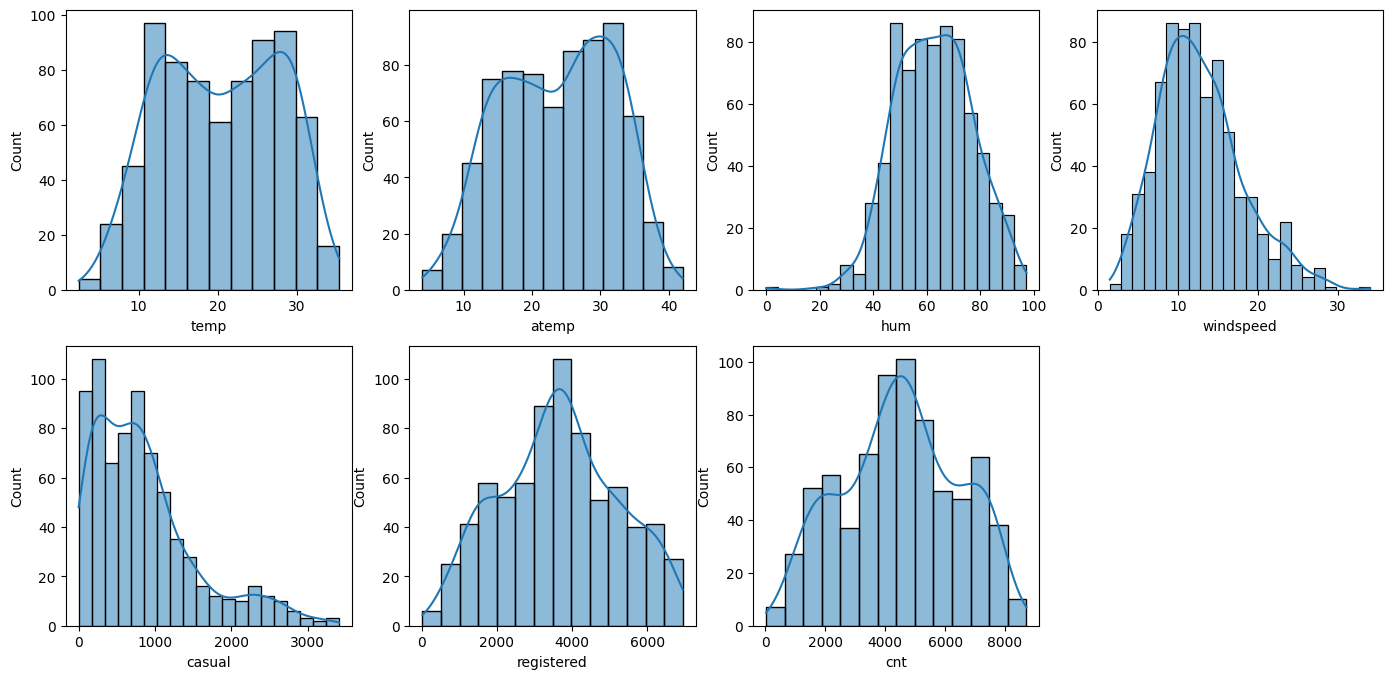

In [780]:
# Univariate Analysis numerical data

plt.figure(figsize=(17, 8))
k=1
for i in num_columns:
        if(k<8):
            plt.subplot(2,4,k)
            sns.histplot(x=df[i],kde=True)
            k+=1
plt.show()


### Segmented Univariate analysis

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

### Outcome:
- Mean of bike rental count is high during **Summer(2) and Fall(3)** in Fig 1.
   * there is some outlier identified on spring as very high rental count around 8000 which is unusual.
   * During winter we have found some outlier as well where usage is 0
- Number of bike rental count is high on below **weathersit** condition.
	* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- Rental count gradually increases from january to july and it decreases steadily starting August till december.
- Rental count is high on non holiday.
- Rental count is high on 2019.


In [781]:
#converting catagorical column to meaningfull data this is a preparatory stem before converting to Dummy variable
#Convert numeric categorical columns to charecter based columns.

weekday_map = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
}
season_map = {
    1: "spring",
    2: "summer",
    3: "fall",
    4: "Winter"
}
weathersit_map = {
    1: "weathersit_1",
    2: "weathersit_2",
    3: "weathersit_3",
    4: "weathersit_4"
}
month_map = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
# Applying the categorical mapping to bike share data set
df["weekday"] = df["weekday"].map(weekday_map)
df["season"] = df["season"].map(season_map)
df["weathersit"] = df["weathersit"].map(weathersit_map)
df["mnth"] = df["mnth"].map(month_map)


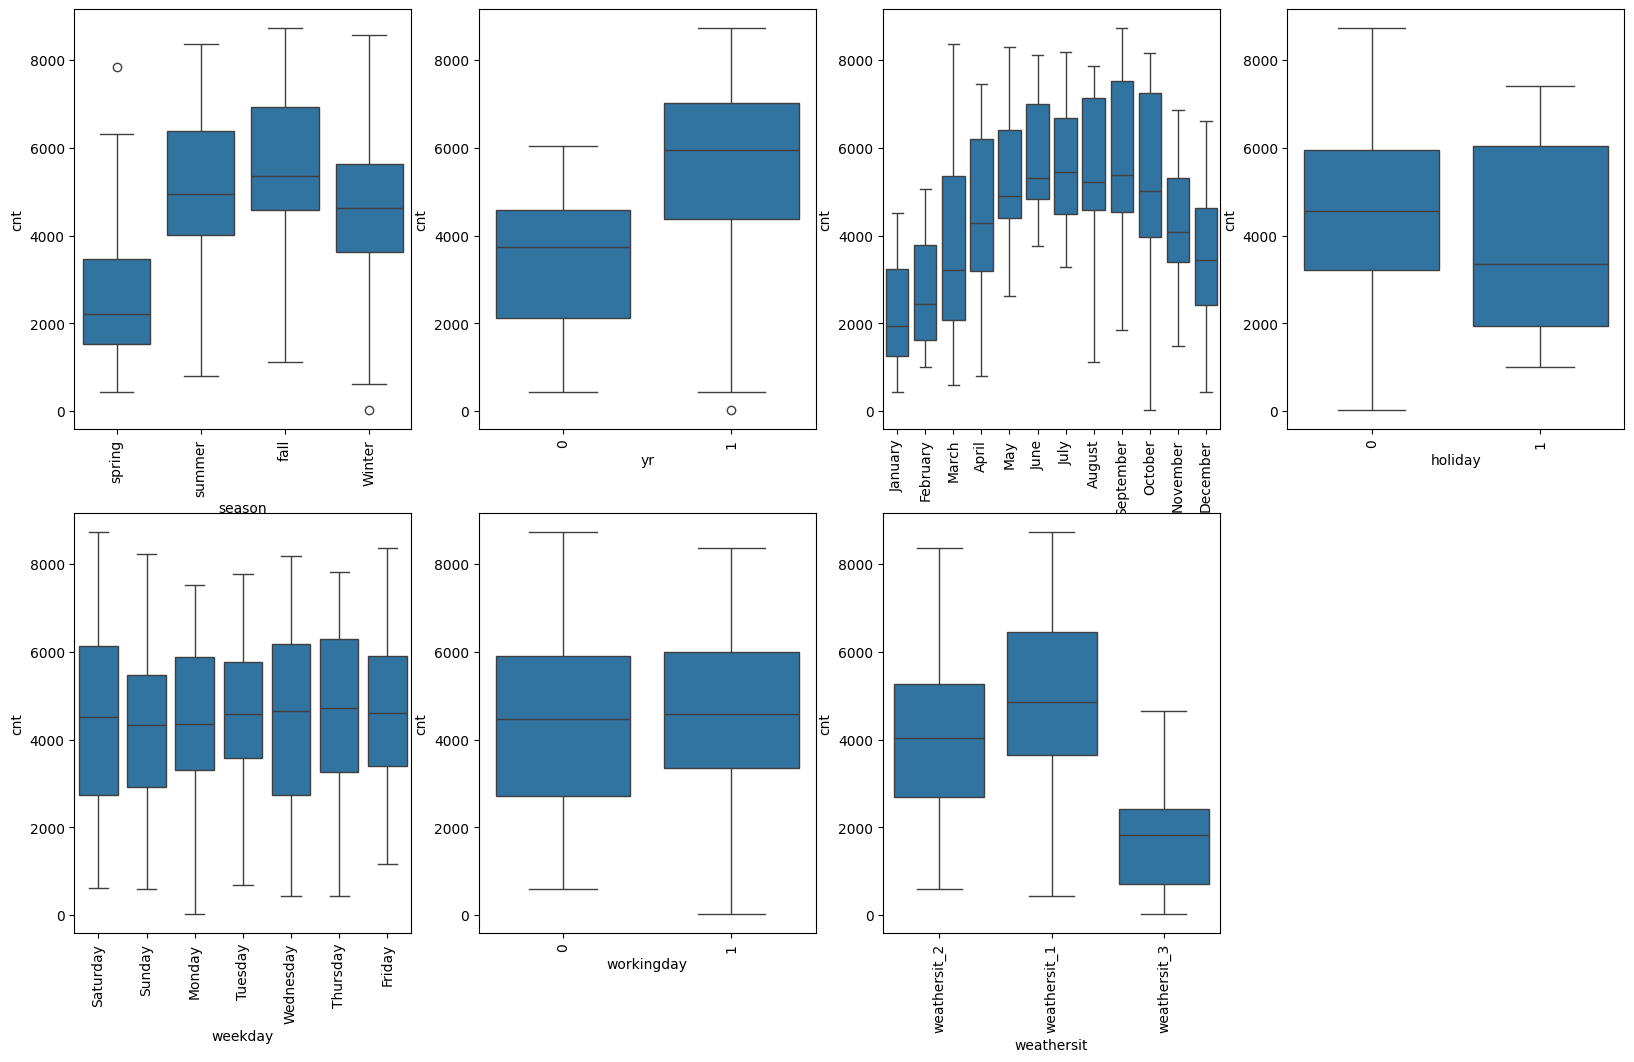

In [782]:
plt.figure(figsize=(20, 12))
l=1
for i in cat_columns:
        if(l<8):
            plt.subplot(2,4,l)
            sns.boxplot(x = i, y = 'cnt', data = df)
            l+=1
            plt.xticks(rotation=90) 
plt.show()

## Bivariate Analysis

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

### Outcome:
 - Clearly there is a high positive co-relation between temparature and feeling temparature and possible cause of multicollinearity
 - Temparature , feeling temprature and bike rental count has positive co-relation
 - Bike rental count has negetive co-relation with wind speed and humidity 


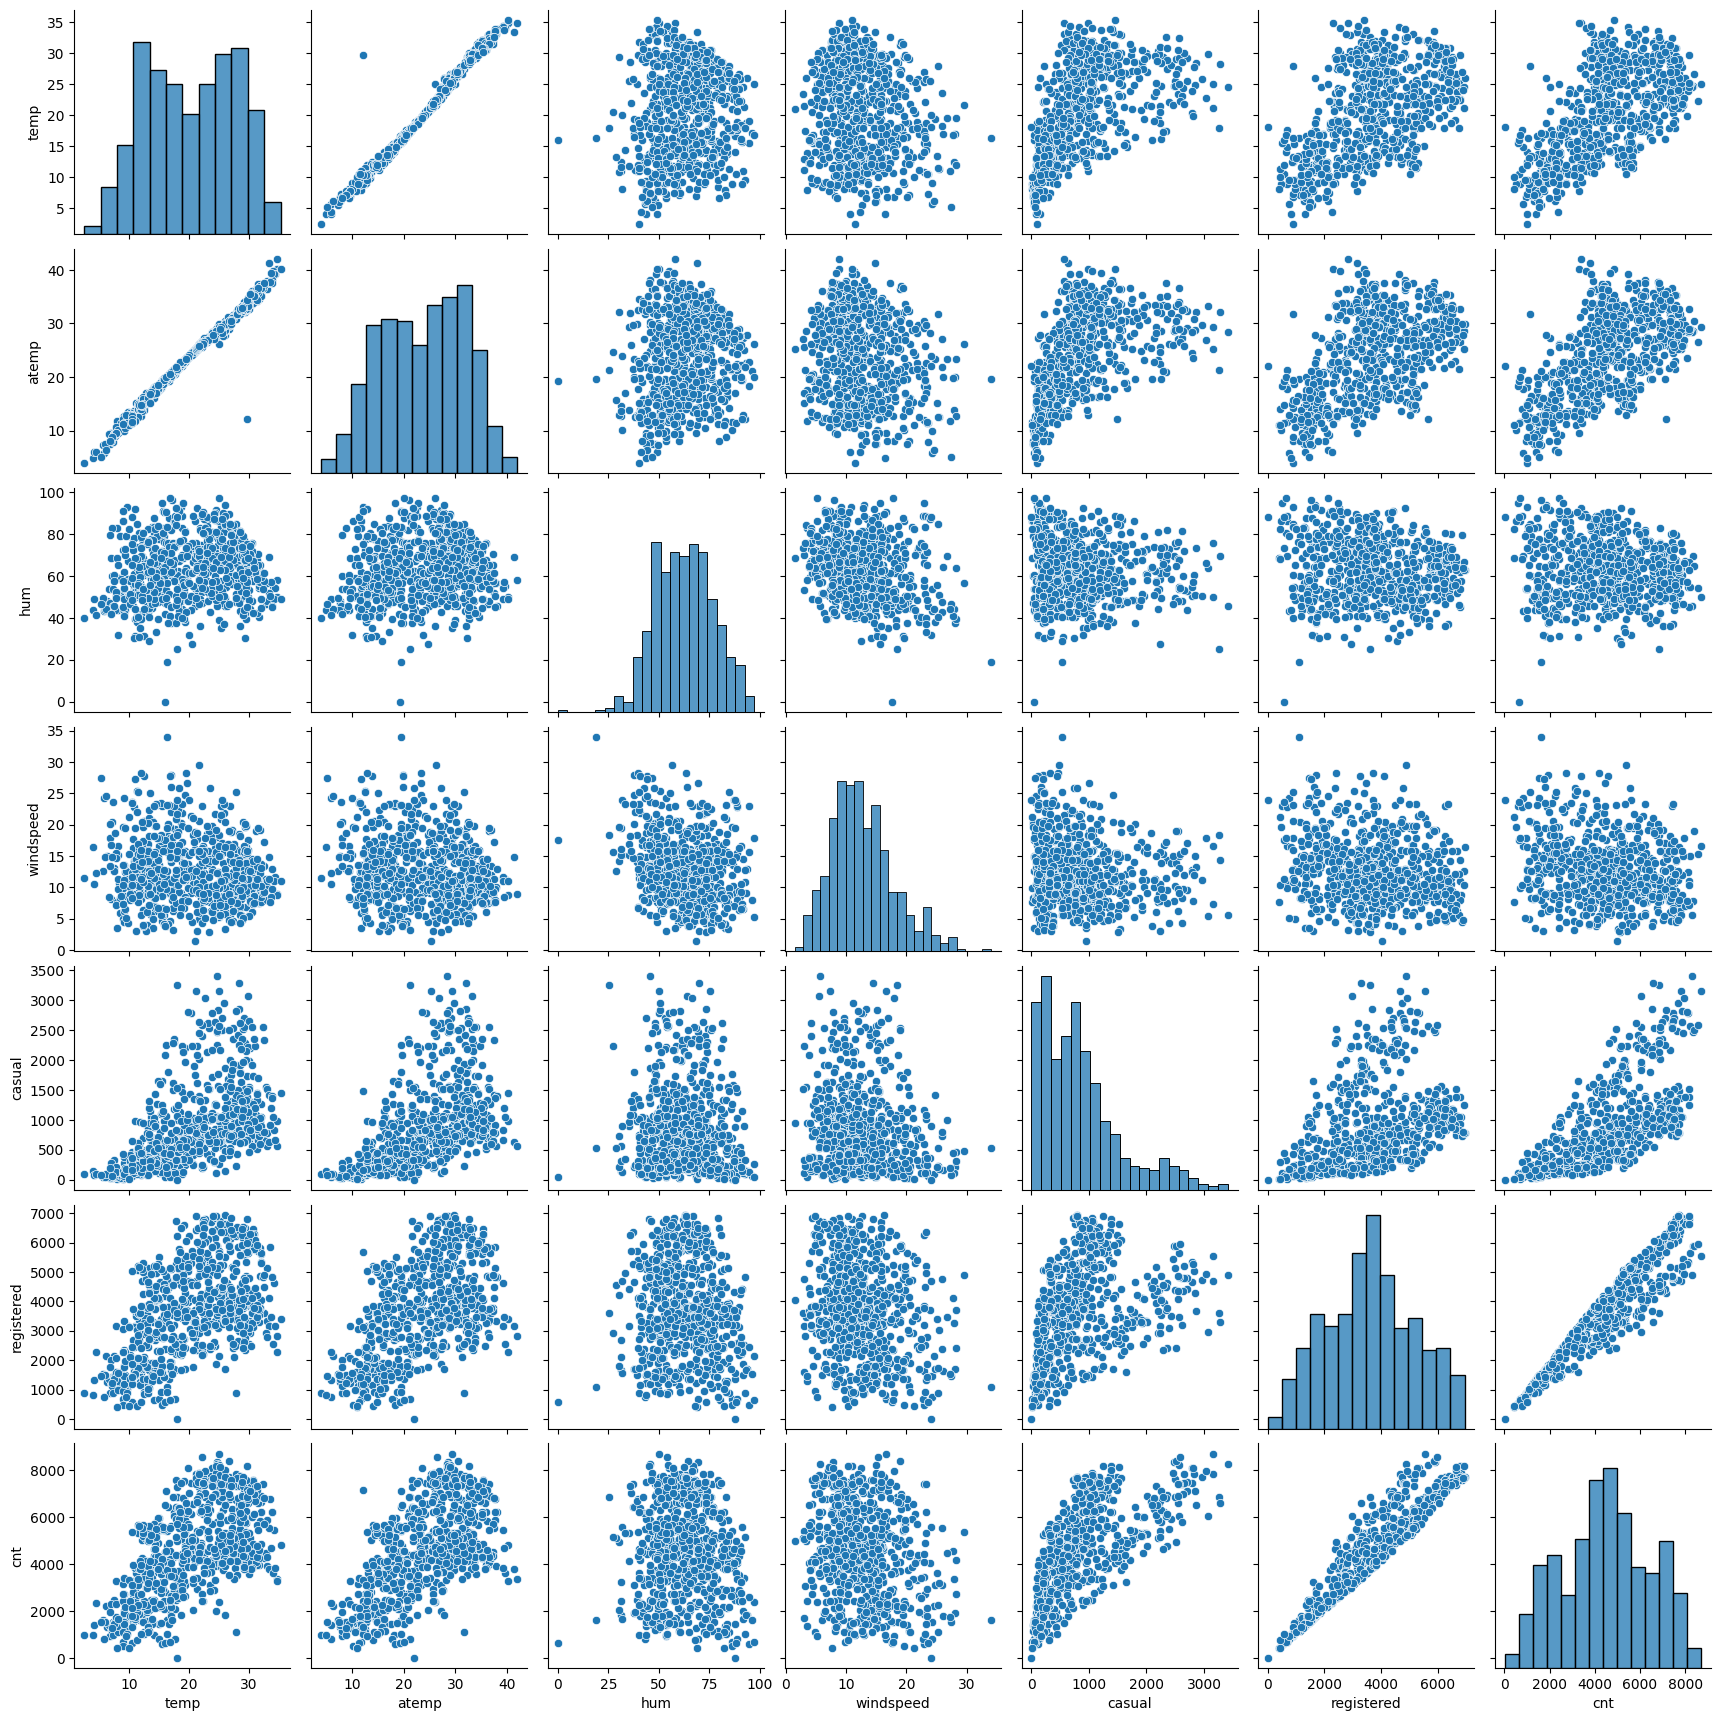

In [783]:
sns.pairplot(df[num_columns])
plt.show()

## Step 3: Data Preparation

- We need to create dummy variable out of caregorical variable.

In [784]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,January,0,Saturday,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,January,0,Sunday,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,January,0,Monday,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,January,0,Tuesday,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,January,0,Wednesday,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [785]:
# Create dummy variable for each categorical variable 'weekday','season','weathersit','mnth'
# Let's drop the first column from status df using 'drop_first = True'
weekday = pd.get_dummies(df['weekday'],drop_first = True,dtype=int)
season = pd.get_dummies(df['season'],drop_first = True,dtype=int)
weathersit = pd.get_dummies(df['weathersit'],drop_first = True,dtype=int)
month = pd.get_dummies(df['mnth'],drop_first = True,dtype=int)


In [786]:
df=pd.concat([df,weekday,season,weathersit,month],axis=1)

In [787]:
# Dropping 'weekday','season','weathersit','mnth' as we have already created dummy variable for that 
df.drop(['weekday','season','weathersit','mnth'], axis = 1, inplace = True)

In [788]:
#Dropping 'instant','dteday' as they are not usefull in model building
#Also removing 'casual','registered' as they are co-related
df.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

In [789]:
df.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Monday,Saturday,...,December,February,January,July,June,March,May,November,October,September
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [790]:
#importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train,df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [791]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


## Step 5: Rescaling the Features 

Scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [792]:
# Importing minmaxscaler fron sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [793]:
df_train=scaler.fit_transform(df_train)

In [794]:
#Converting from ndarray to dataframe
df_train=pd.DataFrame(df_train,columns=df.columns)

In [795]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Monday,Saturday,...,December,February,January,July,June,March,May,November,October,September
0,1.0,0.0,1.0,0.509887,0.501133,0.575354,0.300794,0.864243,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Multivariate Analysis

- Rental count positively corelated with **year** and **temparature**.
- Temparature highly positive corelated with **feeling temparature,count,fall** and negetive co-related with **spring** 
- Rental count is negetively co-related with **windspeed**.

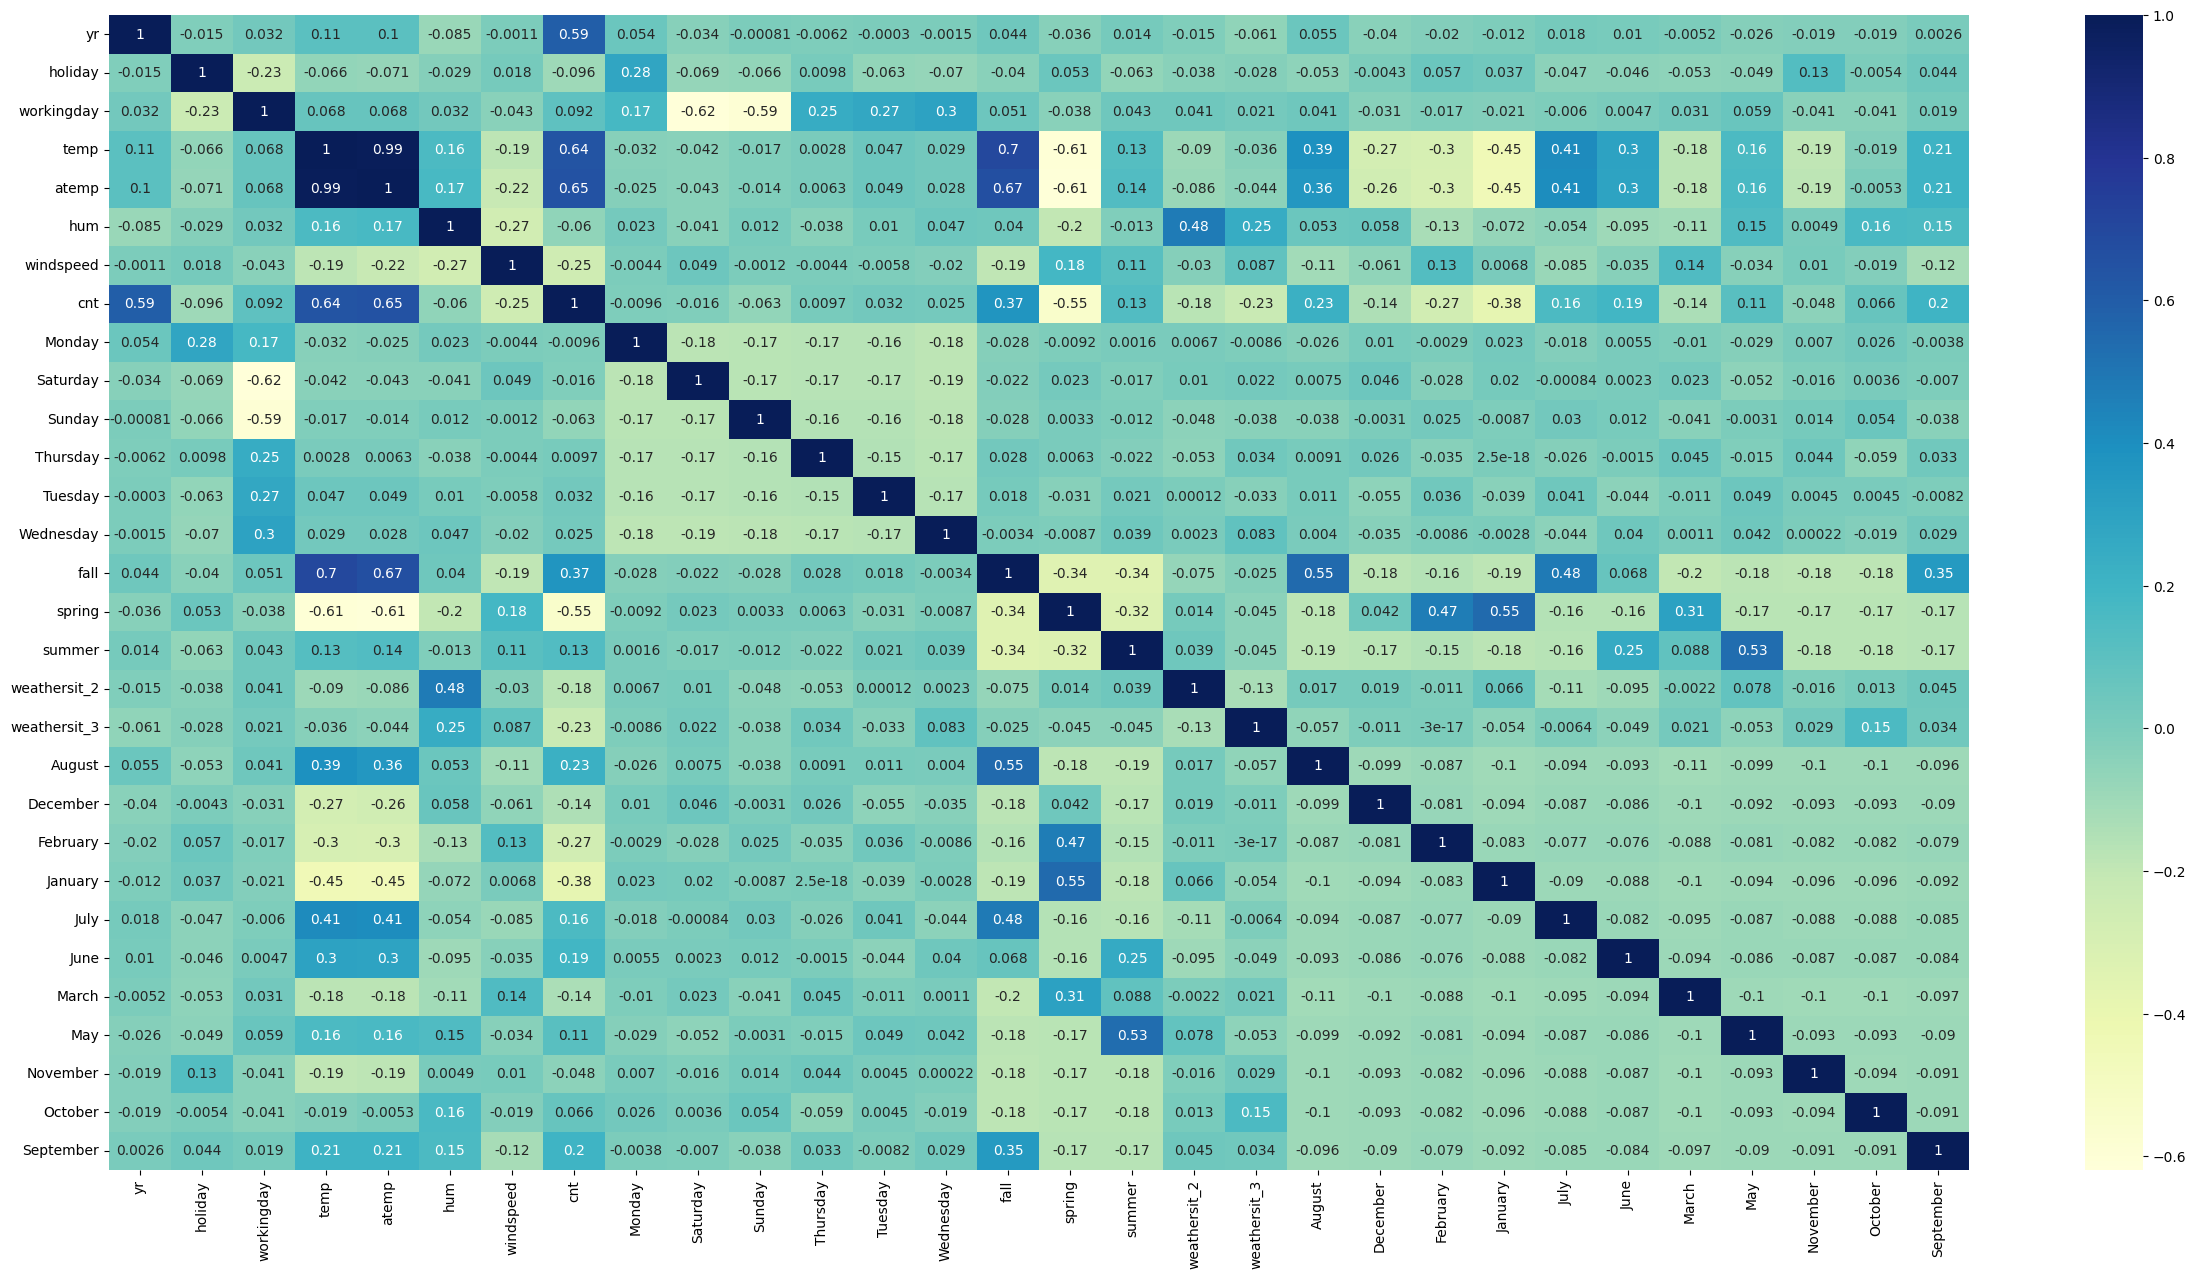

In [796]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

### Dividing into X and Y sets for the model building

In [797]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building our model



### Model 1

In [798]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lm1 = sm.OLS(y_train, X_train_lm).fit()

In [799]:
# Print a summary of the linear regression model obtained
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          8.42e-181
Time:                        00:03:32   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3295      0.037      9.023   

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. 

In [800]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,91.34
3,temp,67.12
4,atemp,56.09
8,Saturday,20.77
9,Sunday,19.50
15,summer,10.68
13,fall,9.86
14,spring,8.08
26,November,6.80
27,October,6.59


##### Acceptable Range for p-values is <0.05 and Acceptable Range for VIF is <5.
In above model there is a high chance of Variables are insignificant and multicollinearity is clearly evident.
so we will use RFE or Recursive feature elimination to eliminate some unwanted colums.

### RFE (Recursive feature elimination)
This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)


In [801]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [802]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [803]:
# Creating list of RFE test outcome
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Monday', False, 10),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 8),
 ('Wednesday', False, 12),
 ('fall', True, 1),
 ('spring', True, 1),
 ('summer', False, 14),
 ('weathersit_2', False, 13),
 ('weathersit_3', True, 1),
 ('August', True, 1),
 ('December', False, 6),
 ('February', False, 7),
 ('January', True, 1),
 ('July', False, 2),
 ('June', False, 9),
 ('March', False, 15),
 ('May', False, 5),
 ('November', False, 3),
 ('October', True, 1),
 ('September', True, 1)]

In [804]:
# Listing colums which are importent / significant for model building 
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Saturday',
       'Sunday', 'fall', 'spring', 'weathersit_3', 'August', 'January',
       'October', 'September'],
      dtype='object')

In [805]:
# Listing columns which are not importent for model building 
X_train.columns[~rfe.support_]

Index(['atemp', 'Monday', 'Thursday', 'Tuesday', 'Wednesday', 'summer',
       'weathersit_2', 'December', 'February', 'July', 'June', 'March', 'May',
       'November'],
      dtype='object')

### Model 2

### Building model using statsmodel, for the detailed statistics

#### Outcome:
* We have found below model has less Rsquared and Adjusted Rsquared values equivalent to previous model and VIF value is under limit.

In [806]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [807]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.1
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          6.75e-186
Time:                        00:03:33   Log-Likelihood:                 504.10
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     495   BIC:                            -914.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3247      0.023     14.036   

In [808]:
# Calculate the VIFs again for the new model

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_rfe = pd.DataFrame()
vif_rfe['Features'] = X_train_rfe.columns
vif_rfe['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_rfe['VIF'] = round(vif_rfe['VIF'], 2)
vif_rfe = vif_rfe.sort_values(by = "VIF", ascending = False)
vif_rfe

,Features,VIF
2,holiday,inf
3,workingday,inf
7,Saturday,inf
8,Sunday,inf
9,fall,3.20
4,temp,3.11
10,spring,2.01
12,August,1.68
13,January,1.54
15,September,1.39


### Model 3

### We need to eliminate more columns based on p value and VIF to get to optimal number of feature variable:

As per RFE it is suggesting to remove 'workingday', 'Saturday', 'summer', 'July', 'November' from feature.

Combining p-values and coefficients with the VIF values, we can refine our list of variables to consider for elimination:

In [809]:
# identifying columns which need to be dropped using RFE 
X_train3 = X_train[X_train.columns[rfe.support_]]
# Running RFE with the output number of the variable equal to 15
lmrfe = LinearRegression()
lmrfe.fit(X_train3, y_train)

rfe1 = RFE(estimator=lmrfe, n_features_to_select=10)             # running RFE
rfe1 = rfe1.fit(X_train3, y_train)


# Listing colums which are importent / significant for model building 
col1 = X_train3.columns[rfe1.support_]
print(col1)


# Listing columns which are not importent for model building 
print(X_train3.columns[~rfe1.support_])

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Saturday',
       'Sunday', 'spring', 'weathersit_3'],
      dtype='object')
Index(['fall', 'August', 'January', 'October', 'September'], dtype='object')


In [810]:
# Removing column November with high p-value as well as it is suggested to remove by RFE

X_train_rfe_3 = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'fall', 'spring','weathersit_2', 'weathersit_3', 'September','workingday', 'Saturday', 'summer', 'July']]

# Add a constant
X_train_rfe_3 = sm.add_constant(X_train_rfe_3)
lm3 = sm.OLS(y_train,X_train_rfe_3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.13e-191
Time:                        00:03:33   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3397      0.031     11.041   

In [811]:
# Calculate the VIFs again for the new model

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_rfe1 = pd.DataFrame()
vif_rfe1['Features'] = X_train_rfe_3.columns
vif_rfe1['VIF'] = [variance_inflation_factor(X_train_rfe_3.values, i) for i in range(X_train_rfe_3.shape[1])]
vif_rfe1['VIF'] = round(vif_rfe1['VIF'], 2)
vif_rfe1 = vif_rfe1.sort_values(by = "VIF", ascending = False)
vif_rfe1

,Features,VIF
0,const,60.97
3,temp,3.62
6,fall,3.62
4,hum,1.91
11,workingday,1.88
7,spring,1.86
13,summer,1.86
12,Saturday,1.78
8,weathersit_2,1.57
14,July,1.49


### Model 4

Combining p-values and coefficients with the VIF values, we can refine our list of variables to consider for elimination:

-  R squared value is good in this model as it havent reduces significantly from 1st model
- VIF value is also very low for all feature columns

In [812]:
# Removing 'workingday', 'Saturday', 'summer', 'July' from feature column as they have low value of co-eficient which will not affect model R squared value.
# RFE also suggested to remove those variables.

# Removing column November with high p-value as well as it is suggested to remove by RFE

X_train_rfe_4 = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'fall', 'spring','weathersit_2', 'weathersit_3', 'September']]

# Add a constant
X_train_rfe_4 = sm.add_constant(X_train_rfe_4)
lm4 = sm.OLS(y_train,X_train_rfe_4).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.3
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.57e-188
Time:                        00:03:34   Log-Likelihood:                 498.60
No. Observations:                 510   AIC:                            -975.2
Df Residuals:                     499   BIC:                            -928.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3745      0.030     12.597   

In [813]:
# Calculate the VIFs again for the new model

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_rfe2 = pd.DataFrame()
vif_rfe2['Features'] = X_train_rfe_4.columns
vif_rfe2['VIF'] = [variance_inflation_factor(X_train_rfe_4.values, i) for i in range(X_train_rfe_4.shape[1])]
vif_rfe2['VIF'] = round(vif_rfe2['VIF'], 2)
vif_rfe2 = vif_rfe2.sort_values(by = "VIF", ascending = False)
vif_rfe2

,Features,VIF
0,const,53.21
3,temp,3.01
6,fall,2.28
4,hum,1.85
7,spring,1.67
8,weathersit_2,1.54
9,weathersit_3,1.24
5,windspeed,1.18
10,September,1.18
1,yr,1.03


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our final predictions using this model only.

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.
Looking into both figures we can conclude:
- Error terms are normally distributed in histogram of error term.
- QQ plot is straight Line and residuals are approximately normally distributed.

In [814]:
y_train_count = lm4.predict(X_train_rfe_4)

Text(0.5, 0, 'Errors')

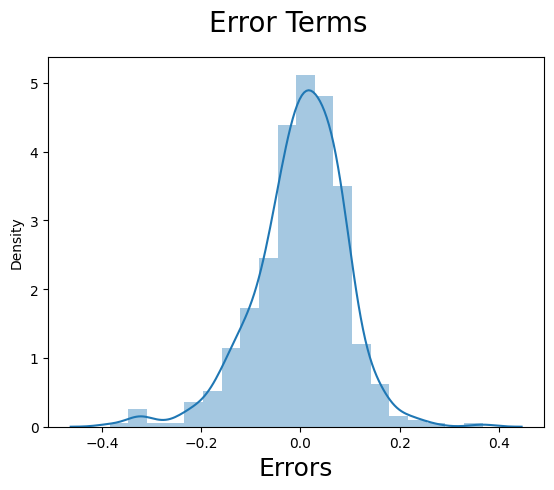

In [815]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

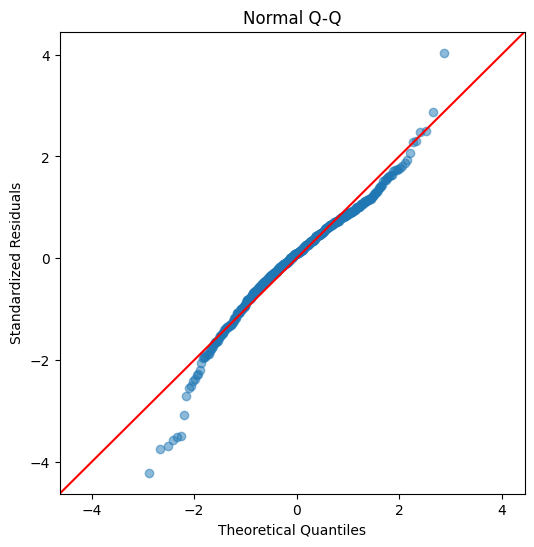

In [839]:
# Create a QQ plot for the data
QQ = ProbPlot(lm4.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(6, 6)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [816]:
df_test=scaler.transform(df_test)# As test data is unseen data we can't fit on it
df_test=pd.DataFrame(df_test,columns=df.columns)

#### Dividing into X_test and y_test

In [817]:
y_test = df_test.pop('cnt')
X_test = df_test[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'fall', 'spring','weathersit_2', 'weathersit_3', 'September']]

In [818]:
X_test.head()

,yr,holiday,temp,hum,windspeed,fall,spring,weathersit_2,weathersit_3,September
0,0.0,1.0,0.831783,0.657364,0.084219,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.901354,0.610133,0.153728,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.511964,0.837699,0.334206,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.881625,0.437098,0.339570,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.817246,0.314298,0.537414,0.0,0.0,0.0,0.0,0.0


In [819]:
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)

In [820]:
# Making predictions using the fourth model

y_pred_lm4 = lm4.predict(X_test_lm4)

## Step 8: Model Evaluation

Comparing R Square between train and Test data.

### Outcome:

As per final model evaluation we have found : -
- Difference in Train and test R2 score is very low and less than 5% (Train: 0.835 Test: 0.809) which mean our model prediction is working fine.
- RMSE for multiple linear regression: 0.091 within permissible limit.
- MAE for multiple linear regression: 0.068  within permissible limit.
- MSE for multiple linear regression: 0.008  within permissible limit.

In [821]:
y_train_pred=lm4.predict(X_train_rfe_4)
y_test_pred=lm4.predict(X_test_lm4)

In [822]:
# Comparing R Square between train and Test data
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,3),"Test:",round(r2_test,3))

Train: 0.835 Test: 0.809


### Finding RMSE , MAE , MSE using sklearn
- RMSE for multiple linear regression: 0.091
- MAE for multiple linear regression: 0.068
- MSE for multiple linear regression: 0.008

In [834]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Predicted values
y_pred_2 = lm4.fittedvalues
# Actual values
y_true_2 = y_train

# Calculate MSE, MAE, RMSE for the multiple linear regression model
mse_2 = mean_squared_error(y_true_2, y_pred_2)
mae_2 = mean_absolute_error(y_true_2, y_pred_2)
rmse_2 = np.sqrt(mse_2)

print(f'RMSE for multiple linear regression: {rmse_2:.3f}')
print(f'MAE for multiple linear regression: {mae_2:.3f}')
print(f'MSE for multiple linear regression: {mse_2:.3f}')

RMSE for multiple linear regression: 0.091
MAE for multiple linear regression: 0.068
MSE for multiple linear regression: 0.008


#### Let's now plot the graph for actual versus predicted values.

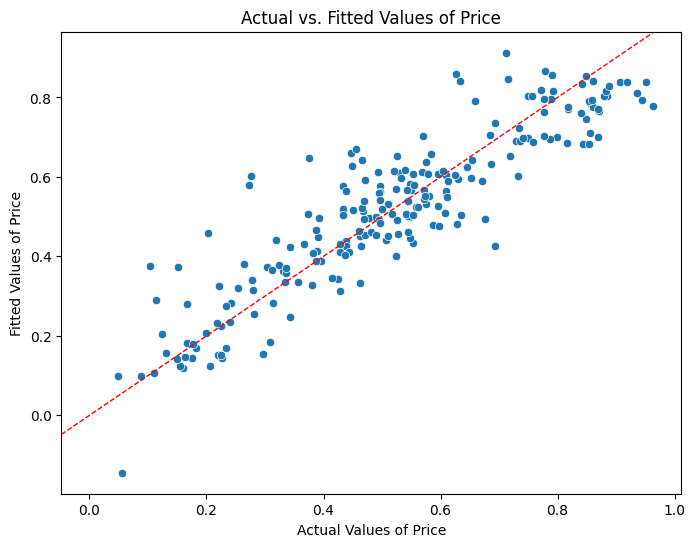

In [836]:
# Create a scatter plot between the fitted and actual values of 'price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test,y=y_pred_lm4)
plt.axline((0, 0), slope=1, linestyle='--', linewidth=1, color='red')
plt.ylabel('Fitted Values of Price')
plt.xlabel('Actual Values of Price')
plt.title('Actual vs. Fitted Values of Price');


### We can see that the equation of our best fitted line is:

$ Cnt = 0.2314  \times  yr - 0.0910 \times  holiday + 0.4698 \times temp - 0.1439 \times hum - 0.1890 \times windspeed - 0.0791 \times fall - 0.1422 \times spring - 0.0580 \times weathersit_2 - 0.2393 \times weathersit_3 + 0.1004 \times September + 0.3745$


In [ ]:
# Attribute Information 	
# instant: record index
	# dteday : date
	# season : season (1:spring, 2:summer, 3:fall, 4:winter)
	# yr : year (0: 2018, 1:2019)
	# mnth : month ( 1 to 12)
	# holiday : weather day is a holiday or not
	# weekday : day of the week
	# workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	# weathersit : 
	#	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	#	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	#	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	#	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	# temp : temperature in Celsius
	# atemp: feeling temperature in Celsius
	# hum: humidity
	# windspeed: wind speed
	# casual: count of casual users
	# registered: count of registered users
	# cnt: count of total rental bikes including both casual and registered